<a href="https://colab.research.google.com/github/sharavana07/Machine-Learning/blob/main/house_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction  

Machine learning and data analysis have become essential tools for extracting insights and making predictions from data. This script demonstrates a **linear regression model** using **Python** and popular data science libraries such as **NumPy, Pandas, Matplotlib, Seaborn, and Scikit-Learn**.  

### **Key Components of the Script:**  
1. **Data Handling:**  
   - `pandas` is used to load and manipulate datasets.  
   - `numpy` provides mathematical operations for efficient computations.  

2. **Data Visualization:**  
   - `matplotlib.pyplot` and `seaborn` are used to generate insightful visualizations.  

3. **Model Implementation:**  
   - The dataset is split into training and testing sets using `train_test_split`.  
   - A **Linear Regression Model** is implemented using `LinearRegression` from `sklearn`.  

4. **Performance Evaluation:**  
   - Metrics such as **Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score** are calculated using `sklearn.metrics` to assess model accuracy.  

### **Objective:**  
The goal is to **train and evaluate a linear regression model** to understand the relationship between input features and target variables. By visualizing and analyzing the results, we can assess how well the model performs in predicting outcomes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **Explanation of the Code**  

This script generates a synthetic dataset for **house prices** based on three key features:  
- **House Size (`Size_in_sqft`)** – Ranges from **800 to 4000 sqft**  
- **Number of Bedrooms (`Num_Bedrooms`)** – Ranges from **1 to 5**  
- **Number of Bathrooms (`Num_Bathrooms`)** – Ranges from **1 to 3**  

The **target variable (`Price`)** is computed using a **linear equation** with some random noise to simulate real-world variations. The equation used is:  

\[
\text{Price} = (\text{Size\_in\_sqft} \times 300) + (\text{Num\_Bedrooms} \times 50000) + (\text{Num\_Bathrooms} \times 30000) + \text{random noise}
\]

### **Key Features of the Code:**  
1. **Reproducibility:**  
   - `np.random.seed(42)` ensures that the same random values are generated every time the script runs.  

2. **Data Generation:**  
   - 50,000 samples are generated using `np.random.randint()` for each feature.  
   - The **house price** is determined based on the features, incorporating **random noise** to make the dataset more realistic.  

3. **Data Storage:**  
   - A **Pandas DataFrame (`df`)** is created to store the generated data.  
   - The `head()` function displays the first few rows of the dataset.  

This dataset will be used to train a **linear regression model** for predicting house prices based on house size, number of bedrooms, and number of bathrooms.

In [28]:
np.random.seed(42)

# Generate 50,000 sample data points
num_samples = 5000

# Independent Variables (Features)
house_size = np.random.randint(800, 4000, num_samples)  # House size in square feet
num_bedrooms = np.random.randint(1, 6, num_samples)  # Number of bedrooms (1 to 5)
num_bathrooms = np.random.randint(1, 4, num_samples)  # Number of bathrooms (1 to 3)

# Generate house prices using a linear equation with some noise
house_price = (
    (house_size * 300) +  # Price contribution from house size
    (num_bedrooms * 50000) +  # Price contribution from bedrooms
    (num_bathrooms * 30000) +  # Price contribution from bathrooms
    np.random.randint(20000, 100000, num_samples)  # Random noise for variation
)

# Create DataFrame
df = pd.DataFrame({
    'Size_in_sqft': house_size,
    'Num_Bedrooms': num_bedrooms,
    'Num_Bathrooms': num_bathrooms,
    'Price': house_price
})

# Display first few rows
print(df.head())

   Size_in_sqft  Num_Bedrooms  Num_Bathrooms    Price
0          3974             5              2  1527652
1          1660             4              3   846862
2          2094             2              1   839671
3          1930             1              2   778217
4          1895             1              2   716800


### **Explanation of the Code**  

This snippet prepares the dataset for training a **Linear Regression Model** by splitting it into **training** and **testing** sets.  

### **Steps Involved:**  

1. **Feature Selection (`X`) and Target Variable (`y`)**  
   - `X` contains **independent variables (features)**:  
     - `Size_in_sqft` (House Size)  
     - `Num_Bedrooms` (Number of Bedrooms)  
     - `Num_Bathrooms` (Number of Bathrooms)  
   - `y` is the **dependent variable (target output)**:  
     - `Price` (House Price)  

2. **Data Splitting using `train_test_split()`**  
   - The dataset is divided into:  
     - **80% Training Data (`X_train`, `y_train`)** – Used for training the model.  
     - **20% Testing Data (`X_test`, `y_test`)** – Used for evaluating model performance.  
   - `random_state=42` ensures **reproducibility**, meaning the split remains the same every time the code is executed.  

### **Purpose of Splitting the Data**  
- **Training Data** helps the model learn patterns and relationships between features and house prices.  
- **Testing Data** ensures that the model generalizes well to unseen data, preventing **overfitting**.  

This step is crucial in **supervised learning**, as it allows us to **train and evaluate** the model effectively.

In [29]:
X = df[['Size_in_sqft', 'Num_Bedrooms', 'Num_Bathrooms']]
y = df['Price']

# Split into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


### **Explanation of the Code**  

This snippet implements and trains a **Linear Regression Model** to predict house prices based on given features.  

### **Steps Involved:**  

1. **Model Creation:**  
   ```python
   model = LinearRegression()
   ```
   - Initializes a **Linear Regression model** from `sklearn.linear_model`.  
   - This model assumes a linear relationship between the features (`X`) and the target variable (`y`).  

2. **Training the Model:**  
   ```python
   model.fit(X_train, y_train)
   ```
   - The model learns from the **training data** (`X_train`, `y_train`).  
   - It finds the best-fitting line (or hyperplane in multiple dimensions) by minimizing the **mean squared error (MSE)**.  

3. **Making Predictions:**  
   ```python
   y_pred = model.predict(X_test)
   ```
   - Uses the trained model to predict house prices (`y_pred`) for the **test dataset (`X_test`)**.  
   - These predictions will be compared with actual values (`y_test`) to assess model performance.  

### **Purpose of This Step**  
- The model is trained to **map input features to output values** based on past data.  
- Predictions will be evaluated using performance metrics (**MAE, MSE, R² score**) to measure **accuracy and reliability**.

In [30]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


### **Explanation of the Code**  

This snippet evaluates the **performance of the Linear Regression model** using key statistical metrics.  

### **Metrics Used for Evaluation:**  

1. **Mean Absolute Error (MAE):**  
   ```python
   mean_absolute_error(y_test, y_pred)
   ```
   - Measures the **average absolute difference** between actual (`y_test`) and predicted (`y_pred`) values.  
   - Lower values indicate better accuracy.  
   - Formula:  
     \[
     MAE = \frac{1}{n} \sum |y_{\text{actual}} - y_{\text{predicted}}|
     \]  

2. **Mean Squared Error (MSE):**  
   ```python
   mean_squared_error(y_test, y_pred)
   ```
   - Measures the **average squared difference** between actual and predicted values.  
   - Penalizes large errors more than MAE.  
   - Formula:  
     \[
     MSE = \frac{1}{n} \sum (y_{\text{actual}} - y_{\text{predicted}})^2
     \]  

3. **Root Mean Squared Error (RMSE):**  
   ```python
   np.sqrt(mean_squared_error(y_test, y_pred))
   ```
   - Represents the standard deviation of prediction errors.  
   - **More interpretable than MSE** because it has the same unit as the target variable.  
   - Formula:  
     \[
     RMSE = \sqrt{MSE}
     \]  

4. **R-squared Score (R²):**  
   ```python
   r2_score(y_test, y_pred)
   ```
   - Measures **how well the model explains variance** in the target variable.  
   - **Ranges from 0 to 1**:  
     - **1** → Perfect fit  
     - **0** → Model explains no variance  
   - Formula:  
     \[
     R^2 = 1 - \frac{\sum (y_{\text{actual}} - y_{\text{predicted}})^2}{\sum (y_{\text{actual}} - \bar{y})^2}
     \]  

### **Purpose of These Metrics**  
- **Lower MAE, MSE, and RMSE** indicate better model accuracy.  
- **Higher R² score** means the model explains more variance in house prices.  
- These metrics help in assessing whether the **linear regression model is a good fit** for the dataset.

In [31]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared Score (R2):", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 19923.171786570856
Mean Squared Error (MSE): 531072297.2803579
Root Mean Squared Error (RMSE): 23045.00590757915
R-squared Score (R2): 0.9937029457490896


### **Explanation of the Code**  

This snippet **visualizes** the performance of the **Linear Regression model** using a scatter plot.  

### **Breakdown of the Code:**  

1. **Scatter Plot of Actual vs. Predicted Values:**  
   ```python
   plt.scatter(y_test, y_pred, alpha=0.5)
   ```
   - Plots **actual house prices (`y_test`)** on the x-axis.  
   - Plots **predicted house prices (`y_pred`)** on the y-axis.  
   - `alpha=0.5` makes points **semi-transparent** for better visibility.  

2. **Axis Labels and Title:**  
   ```python
   plt.xlabel("Actual Prices")
   plt.ylabel("Predicted Prices")
   plt.title("Actual vs Predicted House Prices")
   ```
   - Adds **clear labels** for better understanding.  

3. **Show the Plot:**  
   ```python
   plt.show()
   ```
   - Displays the scatter plot.  

### **Interpretation of the Plot:**  
- **If the model is perfect** → Points lie **exactly on the diagonal line** (y = x).  
- **If the model has some errors** → Points scatter around the diagonal.  
- **If there's no correlation** → Points will be widely spread with no clear pattern.  

### **Purpose of This Visualization:**  
- Helps in identifying patterns, trends, and **potential errors** in the model’s predictions.  
- If the points **deviate too much from the diagonal**, it suggests the model needs improvement.

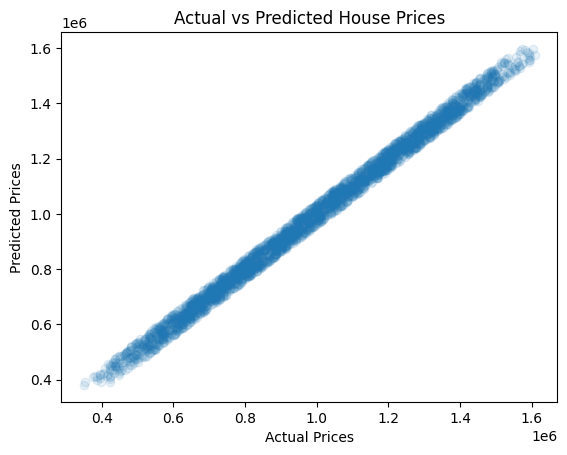

In [32]:
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()